## Imports

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.fft as fft;
import Units
from Units import accUnit, g
from Sequence2param import Sequence2param;
from datetime import datetime;

8.741823036075946


Data imports

In [2]:
#filepath = "./Data/1param_acc_fig2/";
filepath = "../Data/Rust_Runs/SPvMPBayesian/SP_acc_multiparamBayesianpriors/";
filepath2 = "../Data/Rust_Runs/SPvMPBayesian/MP_acc_multiparamBayesianpriors/";

Seq1 = Sequence2param( filepath, generate=False);
Seq2 = Sequence2param( filepath2, generate=False);


### Plotting Comparison Between the Two

In [3]:
plotPaV = Seq1.BayesianUpdating(500,5, 501, save_measurement=False, outcome_file="500.txt")
print("Onto next\n");
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
plotPaV2 = Seq2.BayesianUpdating(500,5, 501, save_measurement=False, outcome_file="500.txt")

Onto next

Current Time = 00:28:14


In [4]:
plotPaV.shape

(101, 501, 51)

In [ ]:
fig=plt.figure()
fig.set_figheight(10);
gs = fig.add_gridspec(4, 2, hspace=0.01, wspace=-0.)
axs = gs.subplots(sharex='col', sharey='row')
AList = Seq1.AList;
VList = Seq2.VList;

measure_points = np.array(range(50,58,2));

for i in range(len(measure_points)):
    ax = axs[i, 0];
    im=ax.imshow(plotPaV[measure_points[i]], extent =[VList[0],VList[-1],AList[0],AList[-1]],  cmap = "magma" ,  aspect=50)

    ax = axs[i, 1];
    im=ax.imshow(plotPaV2[measure_points[i]],  extent =[VList[0],VList[-1],AList[0],AList[-1]], cmap = "magma" ,  aspect=50);

for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
plt.imshow(plotPaV[60][225:275,:],  cmap = "magma" , aspect=1)
plt.imshow(plotPaV2[60][225:275,:],  cmap = "magma" , aspect=1)

In [ ]:
fig=plt.figure()
fig.set_figheight(10);
gs = fig.add_gridspec(4, 2, hspace=0.02, wspace=0.1)
axs = gs.subplots(sharex='col', sharey='row')
AList = Seq1.AList;
VList = Seq2.VList;



measure_points = np.array([40,45, 50, 60]); 
min=np.array([200,210, 220, 225]);
max = np.array([300,290, 280, 275])
aspectarray = np.array([200,200, 200,200])
for i in range(len(measure_points)):
    ax = axs[i, 0];
    im=ax.imshow(plotPaV[measure_points[i]][min[i]:max[i]+1,:], extent =[VList[0],VList[-1],AList[min[i]],AList[max[i]]],  cmap = "magma", aspect='auto')# ,  aspect=aspectarray[i])

    ax = axs[i, 1];
    im=ax.imshow(plotPaV2[measure_points[i]][min[i]:max[i]+1,:],  extent =[VList[0],VList[-1],AList[min[i]],AList[max[i]]], cmap = "magma", aspect='auto')# ,  aspect=aspectarray[i]);

for ax in fig.get_axes():
    ax.label_outer()
#cols = ['Column {}'.format(col) for col in range(1, 4)]
cols = ['Single Param', 'Multi-Param']
rows = ['$N_m$={}'.format(5*row) for row in measure_points]

#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))

for ax, col in zip(axs[0], cols):
    ax.set_title(col)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row+'\n'+'a $(\omega_r v_r)$', rotation=90, size='medium')
    ax.set_xlabel("$V_L$")

for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout()
plt.show()


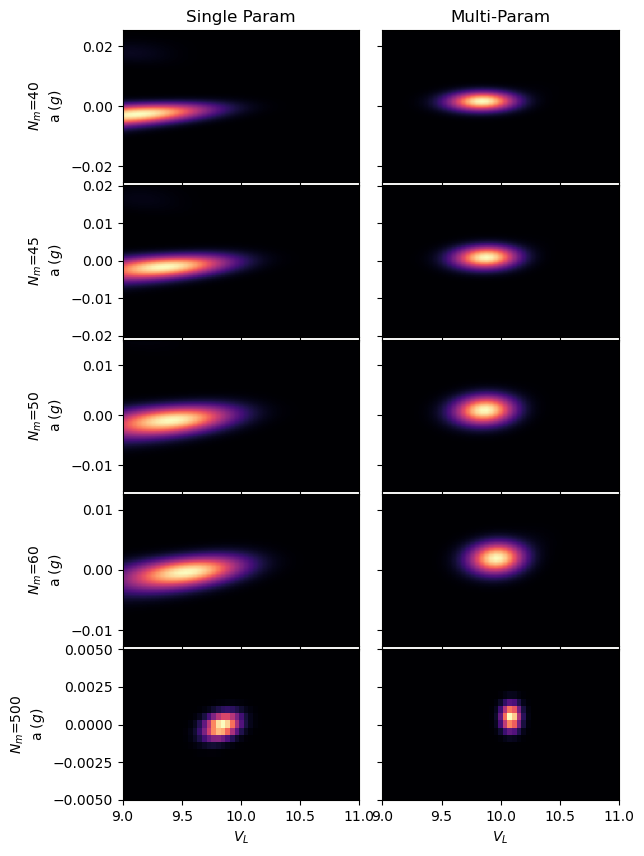

In [18]:
fig=plt.figure()
fig.set_figheight(10);
gs = fig.add_gridspec(5, 2, hspace=0.02, wspace=0.1)
axs = gs.subplots(sharex='col', sharey='row')
AList = Seq1.AList;
VList = Seq2.VList;



measure_points = (np.array([40,45, 50, 60])/5).astype(np.int64); # add a 5 since apparently I was recording way more before lol
min=np.array([200,210, 220, 225]);
max = np.array([300,290, 280, 275])
aspectarray = np.array([200,200, 200,200])
for i in range(len(measure_points)):
    ax = axs[i, 0];
    im=ax.imshow(plotPaV[measure_points[i]][min[i]:max[i]+1,:]*g/accUnit, extent =[VList[0],VList[-1],AList[min[i]]*accUnit/g,AList[max[i]]*accUnit/g],  cmap = "magma", aspect='auto')# ,  aspect=aspectarray[i])

    ax = axs[i, 1];
    im=ax.imshow(plotPaV2[measure_points[i]][min[i]:max[i]+1,:]*g/accUnit,  extent =[VList[0],VList[-1],AList[min[i]]*accUnit/g,AList[max[i]]*accUnit/g], cmap = "magma", aspect='auto')# ,  aspect=aspectarray[i]);


max_f = 260;
min_f = 240;
axs[-1,0].imshow(plotPaV[-1][min_f:max_f+1] *g/accUnit,extent =[VList[0],VList[-1],AList[min_f]*accUnit/g,AList[max_f]*accUnit/g],cmap="magma", aspect="auto");

axs[-1,1].imshow(plotPaV2[-1] [min_f:max_f+1]*g/accUnit,extent =[VList[0],VList[-1],AList[min_f]*accUnit/g,AList[max_f]*accUnit/g],  cmap ="magma", aspect="auto");

for ax in fig.get_axes():
    ax.label_outer()
#cols = ['Column {}'.format(col) for col in range(1, 4)]
cols = ['Single Param', 'Multi-Param']
rows = ['$N_m$={}'.format(5*row) for row in measure_points]

#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))

for ax, col in zip(axs[0], cols):
    ax.set_title(col)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row+'\n'+'a $(g)$', rotation=90, size='medium')
    ax.set_xlabel("$V_L$")

axs[-1,0].set_ylabel('$N_m$={}'.format(5*(len(plotPaV)-1))+'\n'+'a $(g)$', rotation=90, size='medium')
axs[-1,0].set_xlabel("$V_L$");
axs[-1,1].set_xlabel("$V_L$");

for ax in fig.get_axes():
    ax.label_outer()
#fig.tight_layout()
#plt.savefig("SPvMPComparison.pdf")
plt.show()
